# Trabalho Avaliativo - Regressão
#### A 2º nota da disciplina será dividida em 3 partes, dois trabalhos de regressão (6 pontos) e um de classificação que passarei futuramente (4 pontos).

# 1) CRIANDO UM MODELO DE REGRESSÃO LINEAR SIMPLES (3 PONTOS) - MESMO GRUPO DOS TRABALHOS ANTERIORES
#### Com base nas formulas apresentadas abaixo, crie em python um algoritmo de regressão linear simples que receba os dados de um unico atributo e realize a predição do preço dos imoveis.

A fórmula básica da regressão linear simples é:

![Equação:](img/equacao.PNG)

Onde:

* y é a é a variável dependente (target previsto)
* x é a variável independente (feature conhecida)
* 𝛽0 é o coeficiente liner (interceptação no eixo y)
* 𝛽1 é o coeficiente de inclinação

Os coeficientes 𝛽0 e 𝛽1 podem ser calculados com fórmulas derivadas do método dos mínimos quadrados:

![Equação2:](img/equacao-betas.PNG)

* X𝑖 e Y𝑖 são os valores observados das variáveis independente e dependente, respectivamente.
* x̅ é a média dos valores de 
* $\bar{y}$ é a média dos valores de 
* n é o número de observações.

#### CARREGANDO OS DADOS

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

import pandas as pd
dataset = pd.DataFrame(housing.data)
dataset.columns = housing.feature_names
dataset['Price'] = housing.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


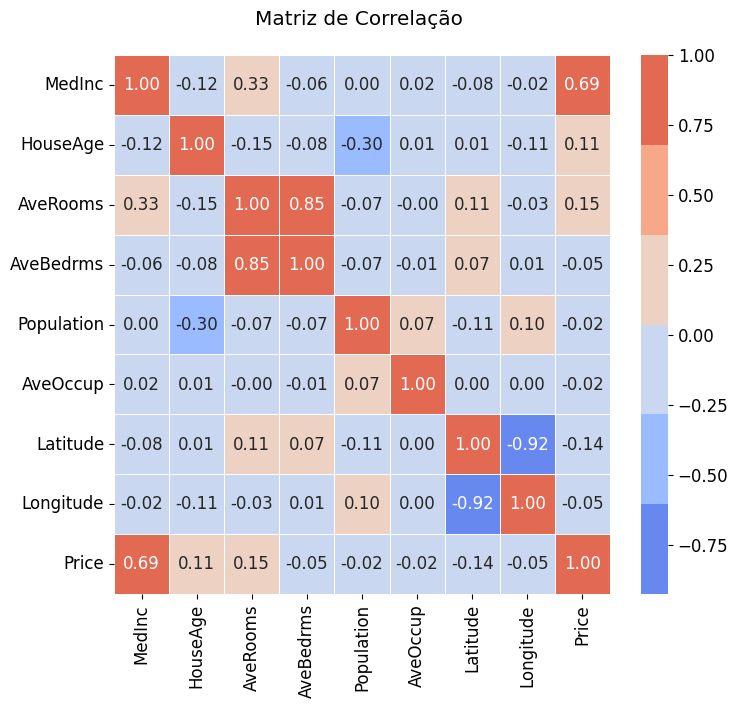

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

correlation_matrix = dataset.corr()
plt.rc('font', size=12)
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, cmap=sns.color_palette("coolwarm"), linewidths=.5, annot=True, fmt='.2f');
plt.title('Matriz de Correlação \n')
plt.show()

In [5]:
X = dataset['MedInc'].to_frame()
y = dataset['Price'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### TESTANDO COM O SKLEARN

Utilizem os valores de a (b1), b (b2) e MSE obtidos com o scikit-learn para comparar com os valores obtidos pelo modelo criado por vocês.

a = [0.41819327]
b = 0.4479496555604314
Mean Squared Error (MSE): 0.6917979868048499


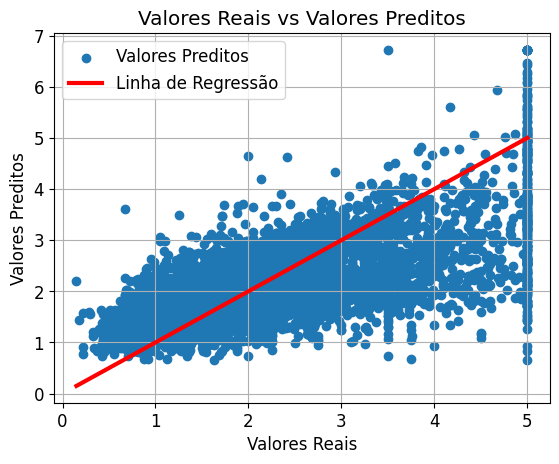

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('a = ' + str(model.coef_))
print('b = ' + str(model.intercept_))

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

plt.figure()
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Valores Preditos')
plt.scatter(y_test, y_pred, label='Valores Preditos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', linewidth=3, label='Linha de Regressão')
plt.legend()
plt.grid()
plt.show()

#### FAÇA SEU CÓDIGO AQUI:

# 2) REALIZANDO A PREDIÇÃO DE PREÇOS DE ALUGUEIS (3 PONTOS) - INDIVIDUAL

* A Atividade consiste em treinar um modelo para estimar o preço de alugueis
* Os alunos devem treinar o modelo com os dados de treino (X_train e y_train), em seguida devem predizer os rotulos para o X_test e salva-los no arquivo y_pred.csv. 
* Para avaliar seus resultados, acesse o link: https://ranking-regressao.streamlit.app/, insira seu nome, escolha sua turma e faça upload do arquivo y_pred que contém seus rotulos preditos, instantaneamente o sistema irá calcular sua pontuação. Para salvar sua pontuação clique no botão "Cadastrar Resultado no Ranking", faça isso apenas quanto tiver obtido seu melhor resultado.
* O aluno que obtiver os melhores resultados receberá 10 como média geral da disciplina e estara automaticamente aprovado, ficando livre de todos os outros trabalhos.

**Observação**: Enquanto estão testando seus modelos, vocês podem dividir o X_train e y_train, até achar o melhor modelo na melhor combinação de hiperparâmetros, porém ao final devem treinar com todos os dados e predizer o x_test.

In [42]:
import pandas as pd
import numpy as np

# Leitura dos dados
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8553 entries, 0 to 8552
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cidade            8553 non-null   object
 1   area              8553 non-null   int64 
 2   quartos           8553 non-null   int64 
 3   banheiro          8553 non-null   int64 
 4   garagens          8553 non-null   int64 
 5   andar             8553 non-null   object
 6   animal            8553 non-null   object
 7   mobilia           8553 non-null   object
 8   condominio_reais  8553 non-null   int64 
 9   iptu              8553 non-null   int64 
 10  seguro_incendio   8553 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 735.1+ KB


In [44]:
X_train

,cidade,area,quartos,banheiro,garagens,andar,animal,mobilia,condominio_reais,iptu,seguro_incendio
0,Campinas,12732,3,2,0,3,acept,not furnished,700,96,21
1,Rio de Janeiro,45,1,1,0,6,acept,not furnished,560,80,25
2,São Paulo,90,3,3,2,-,acept,not furnished,0,50,31
3,Porto Alegre,37,1,1,0,2,acept,not furnished,220,13,10
4,São Paulo,16,1,1,0,1,not acept,not furnished,0,9,11
...,...,...,...,...,...,...,...,...,...,...,...
8548,Belo Horizonte,95,3,2,2,2,not acept,not furnished,150,145,22
8549,Porto Alegre,218,3,5,2,3,acept,furnished,1160,409,73
8550,São Paulo,73,2,1,1,4,acept,not furnished,680,21,17
8551,São Paulo,300,4,7,4,1,acept,not furnished,3000,1405,125


**DICAS/OBSERVAÇÕES:**
- Serão necessários alguns pré-processamentos, exemplos: O atributo animal esta com dados acept e not acept, sendo necessário transformar em booleano (True e False), ou inteiro (0 e 1). O atributo andar é um dado numérico, porém está como object, porque ele está assim? Será que tem strings no meio dos números?
- Não é necessário realizar a separação dos dados em Treino e Teste pois a mesma já foi realizada pelo professor.
- Para melhorar seus resultados você pode utilizar outros modelos, testar diferentes hiperparâmetros dos modelos manualmente ou automatizar o teste dos hiperparâmetros com GridSearch, realizar algum outro pré-processamento, tentar criar novos atributos através da combinação de atributos existentes, tentar realizar aumento de dados, remover dados com valores discrepantes (caso existam), etc.

#### FAÇA SEU CÓDIGO AQUI:

**O CODIGO ABAIXO É UMA SIMPLIFICAÇÃO DO QUE DEVE SER FEITO**

**ATENÇÃO!** O pré-processamento feito no X_train também deve ser feito no X_test. Caso haja remoção de linhas no X_train vocês devem tomar cuidado para que as mesmas linhas sejam removidas no Y_train. Além disso, deve-se salvar as previsões (y_pred) com os mesmos indices do X_test igual eu mostrei abaixo.

In [ ]:
# # ------------- Função de pré-processamento ------------------- 
# def preprocess(df):
#     # ... faça seu pré-processamento aqui
#     return df

# # Aplicar o pré-processamento a X_train 
# X_train_processed = preprocess(X_train)

# # Sincronizar y_train com X_train após o pré-processamento (necessário caso haja remoção de linhas)
# y_train = y_train.loc[X_train_processed.index]

# # Aplicar o pré-processamento a X_test
# X_test_processed = preprocess(X_test)

# # -------------  Treinamento do modelo ------------------------- 
# model = modeloEscolhidoNoSklearn()
# model.fit(X_train_processed, y_train)

# # -------------  Previsão --------------------------------------
# y_pred = model.predict(X_test_processed)

# # -------------  Salvar previsões em um CSV
# y_pred_df = pd.DataFrame(y_pred, index=X_test_processed.index, columns=['aluguel'])
# y_pred_df.to_csv("y_pred.csv")
# # --------------------------------------------------------------
# # --------------------------------------------------------------
# ## ----------- caclulando as métricas (NECESSITA DO Y_TRUE) ---- 
# # from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, mean_squared_log_error
# # y_test_filtered = y_test.loc[y_pred_df.index]
# # print("MSE =  ", mean_squared_error(y_test_filtered,y_pred))
# # print("MAE =  ", mean_absolute_error(y_test_filtered,y_pred))
# # print("rmse =  ", np.sqrt(mean_squared_error(y_test_filtered,y_pred)))
# # print("R2 =  ", r2_score(y_test_filtered,y_pred))